# **Entrega final Estefanía Delfino**

**Hipótesis**

Los latinos en Estados Unidos que reportan una intención de voto por el candidato del Partido Demócrata para la Cámara de Representantes y una preferencia por el término "Latino" son más propensos a tener una opinión favorable sobre la administración de Joe Biden y a priorizar políticas relacionadas con la igualdad racial y la inmigración en comparación con aquellos que prefieren los términos "Hispanic" o "Latinx" y se inclinan hacia otros candidatos o no están seguros.

**Abstract**

Este estudio se centra en investigar la relación entre la intención de voto por el Partido Demócrata, la preferencia terminológica "Latinx", y las opiniones sobre la administración de Joe Biden entre la comunidad latina en los Estados Unidos. La hipótesis principal sugiere que los latinos que muestran una intención de voto por el Partido Demócrata y prefieren el término "Latinx" serán más propensos a tener una opinión favorable sobre Biden y a priorizar políticas relacionadas con la igualdad racial y la inmigración. Este estudio busca comprender cómo la alineación política y las preferencias terminológicas influyen en las actitudes hacia el liderazgo político y las políticas públicas entre los latinos en Estados Unidos.
El análisis se basará en datos recolectados a través de un cuestionario estructurado que aborda temas como la intención de voto, la preferencia terminológica, las opiniones sobre Joe Biden y la identificación racial.
Se espera que los resultados de este estudio proporcionen información valiosa sobre cómo las identidades políticas y terminológicas influyen en las actitudes y comportamientos políticos de los latinos en Estados Unidos. Además, se espera que este estudio contribuya a una comprensión más profunda de las dinámicas políticas y culturales dentro de la comunidad latina, así como a informar sobre estrategias políticas y de comunicación dirigidas a este grupo demográfico en el futuro.

**Preguntas de interés:**

•	¿Cómo se distribuye la identificación política entre los encuestados en función de su preferencia terminológica ("Latinx", "Hispanic", "Latino")?

•	¿Cuál es la opinión predominante sobre la administración de Joe Biden entre los encuestados, considerando su identificación política y preferencia terminológica?

•	¿Cómo varían las prioridades políticas de los encuestados en función de su identificación política y preferencia terminológica?


# **Objetivo**

Analizar cómo la preferencia terminológica (Hispano, Latino, Latinx) afecta las opiniones políticas y la percepción sobre la administración de Biden entre los encuestados de origen hispano en Estados Unidos.

# "Contexto Comercial"

En Estados Unidos, la comunidad hispana es un segmento electoral clave que puede influir en los resultados de las elecciones. Comprender cómo las diferentes preferencias terminológicas (Hispano, Latino, Latinx) están relacionadas con las opiniones políticas puede ayudar a los estrategas políticos a desarrollar campañas más efectivas y dirigidas.

In [124]:
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [125]:
# DS en GitHub
url = 'https://github.com/estefaniadelfino/CoderPrimeraEntrega/raw/main/EstefaniaDelfino_EntregaI.xlsx'

In [126]:
# Leer el archivo Excel desde la URL
df = pd.read_excel(url, engine='openpyxl')

# Verificación de las primeras filas
print(df.head())

   id  sat_sit_pais  gest_biden describe_biden_modelo  \
0  10     Satisfied     Approve             Very well   
1  11  Dissatisfied     Approve             Very well   
2  12     Satisfied  Disapprove       Not at all well   
3  13  Dissatisfied  Disapprove           Fairly well   
4  18  Dissatisfied     Approve             Very well   

  describe_biden_necesidades describe_biden_defiende describe_biden_honesto  \
0               Not too well             Fairly well            Fairly well   
1                  Very well               Very well              Very well   
2            Not at all well         Not at all well        Not at all well   
3            Not at all well            Not too well        Not at all well   
4                  Very well               Very well              Very well   

  describe_biden_inspirador  \
0                 Very well   
1                 Very well   
2           Not at all well   
3              Not too well   
4               Fairly well

# **INVESTIGANDO EL DATASET**

In [127]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7647 entries, 0 to 7646
Data columns (total 60 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          7647 non-null   int64  
 1   sat_sit_pais                7647 non-null   object 
 2   gest_biden                  7647 non-null   object 
 3   describe_biden_modelo       7647 non-null   object 
 4   describe_biden_necesidades  7647 non-null   object 
 5   describe_biden_defiende     7647 non-null   object 
 6   describe_biden_honesto      7647 non-null   object 
 7   describe_biden_inspirador   7647 non-null   object 
 8   voto_camara                 6929 non-null   object 
 9   piensa_voto                 6929 non-null   object 
 10  pr_sentimiento_gana_camara  7647 non-null   object 
 11  pd_sentimiento_gana_camara  7647 non-null   object 
 12  imp_aborto                  6929 non-null   object 
 13  imp_educacion               6929 

# **# IDENTIFICACIÓN DE VARIABLES RELEVANTES**

  No se usarán todas pero, de cualquier manera, se identificaran todas aquellas que puedan tener relación con la hipótesis planteada.

**gest_biden**: evaluación de la gestión de Joe Biden

**voto_camara**: si las elecciones en la Cámara de Representantes fuesen hoy, ¿por quién votaría?

**imp_raza:** ¿Cuán importante es para usted las políticas raciales a la hora de definir su voto?

**imp_inmigracion**: ¿Cuán importante es para usted las políticas de inmigración a la hora de definir su voto?

**pr_lo_representa**: ¿Qué tan bien representa el Partido Repúblicado los intereses de gente como usted?

**pd_lo_representa**: ¿Qué tan bien representa el Partido Demócrata los intereses de gente como usted?

**pref_hisp_lat**: Los términos hispano, latino o latinx se utilizan para describir a personas de origen o ascendencia hispana o latina. ¿Cuál de estos términos prefiere?

**age**

**gender**

**party**

**ideology**

In [128]:
# Verificación de valores faltantes en las columnas de interés
variables_interes = ['gest_biden', 'voto_camara', 'imp_raza', 'imp_inmigracion',
                     'pr_lo_representa', 'pd_lo_representa', 'pref_hisp_lat',
                     'age', 'gender', 'party', 'ideology']

for var in variables_interes:
    print(f'{var}: {df[var].isnull().sum()} valores faltantes')

gest_biden: 0 valores faltantes
voto_camara: 718 valores faltantes
imp_raza: 718 valores faltantes
imp_inmigracion: 718 valores faltantes
pr_lo_representa: 0 valores faltantes
pd_lo_representa: 0 valores faltantes
pref_hisp_lat: 4618 valores faltantes
age: 0 valores faltantes
gender: 0 valores faltantes
party: 0 valores faltantes
ideology: 0 valores faltantes


In [129]:
# Imputación de valores faltantes con la moda de cada columna
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')
df[variables_interes] = imputer.fit_transform(df[variables_interes])

# Verificación valores faltantes
for var in variables_interes:
    print(f'{var}: {df[var].isnull().sum()} valores faltantes')

gest_biden: 0 valores faltantes
voto_camara: 0 valores faltantes
imp_raza: 0 valores faltantes
imp_inmigracion: 0 valores faltantes
pr_lo_representa: 0 valores faltantes
pd_lo_representa: 0 valores faltantes
pref_hisp_lat: 0 valores faltantes
age: 0 valores faltantes
gender: 0 valores faltantes
party: 0 valores faltantes
ideology: 0 valores faltantes


# Análisis descriptivo y visualización

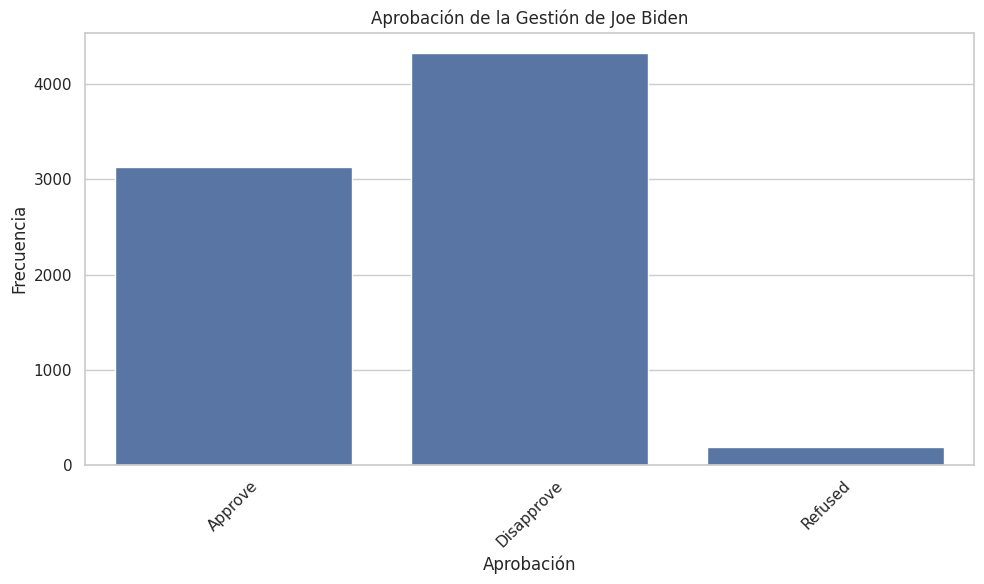

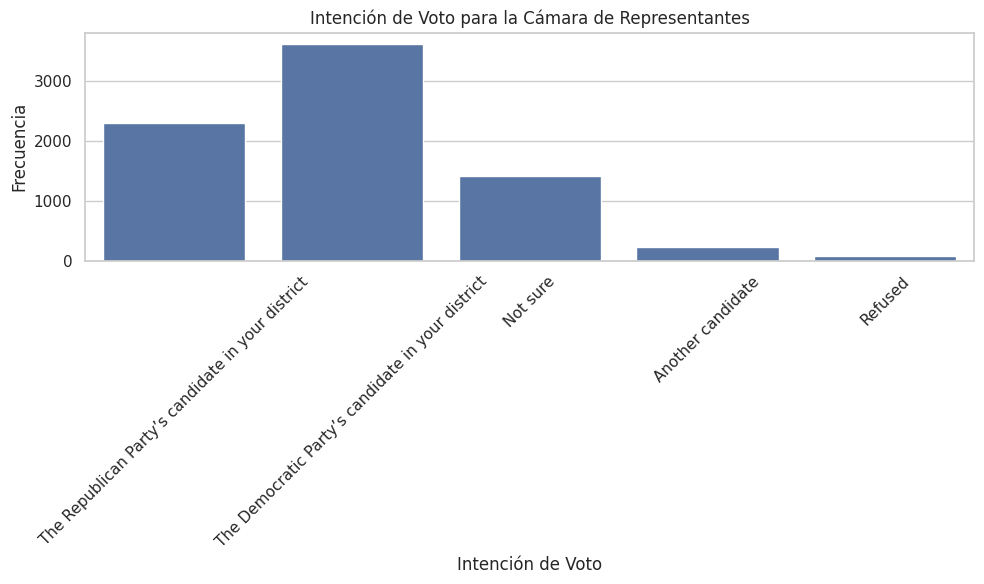

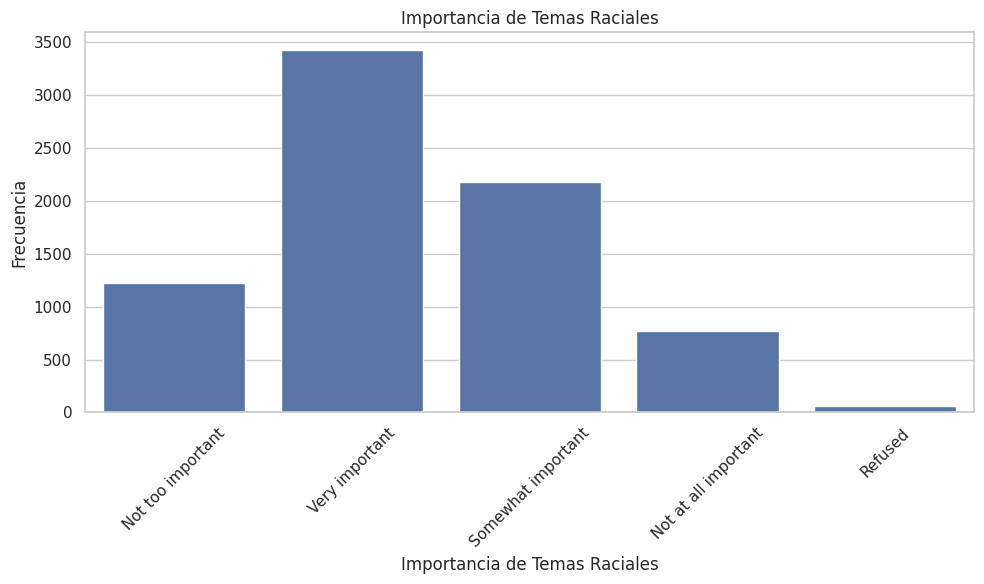

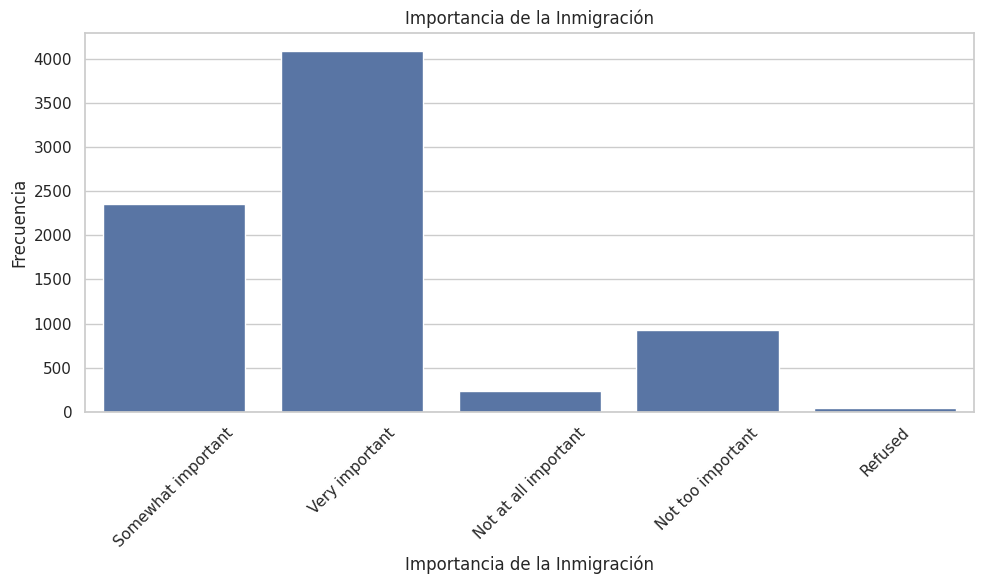

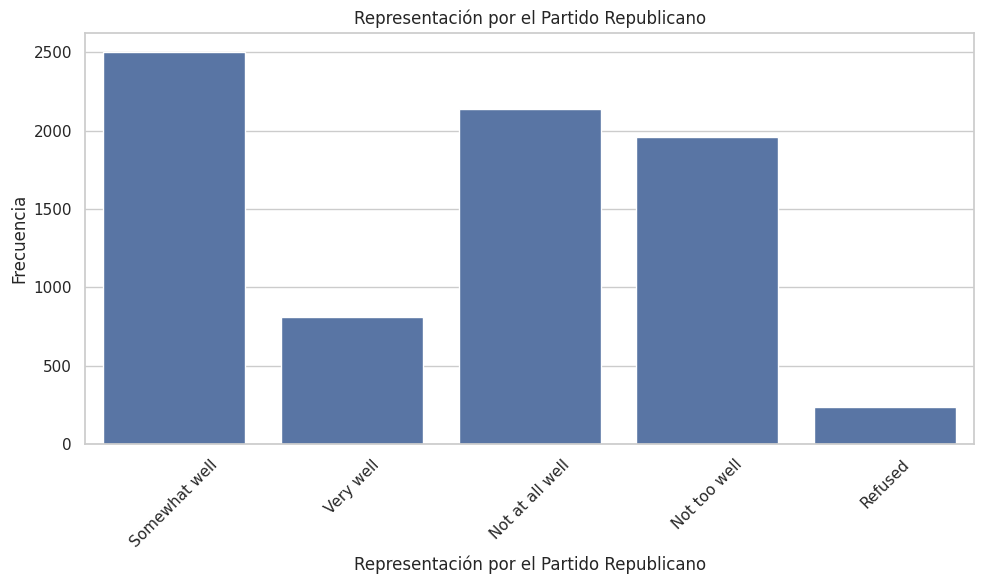

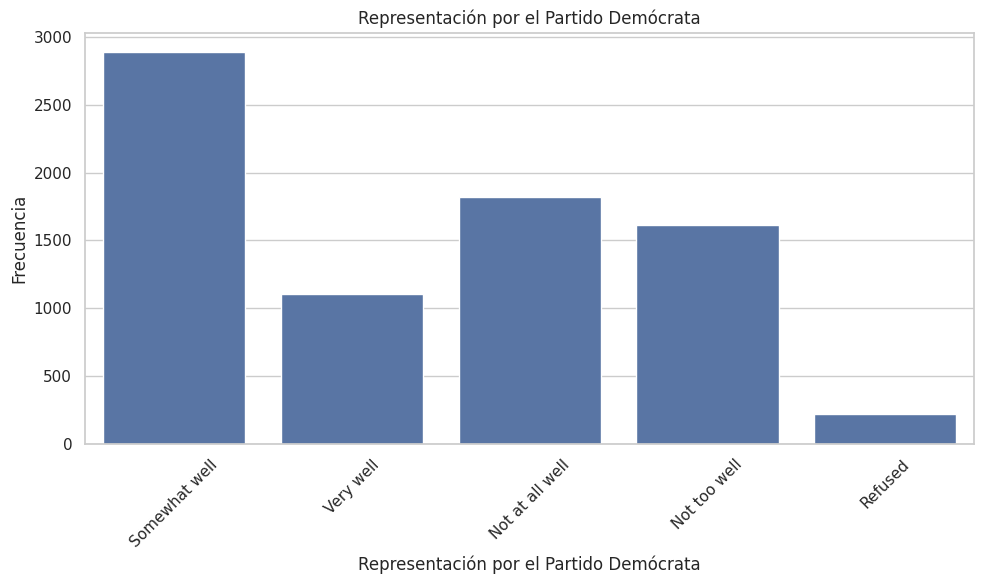

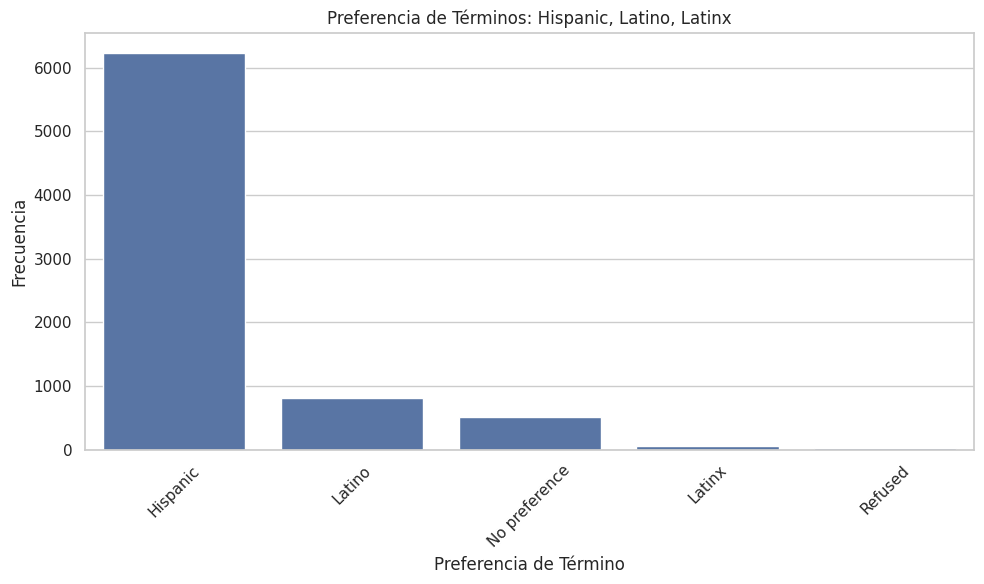

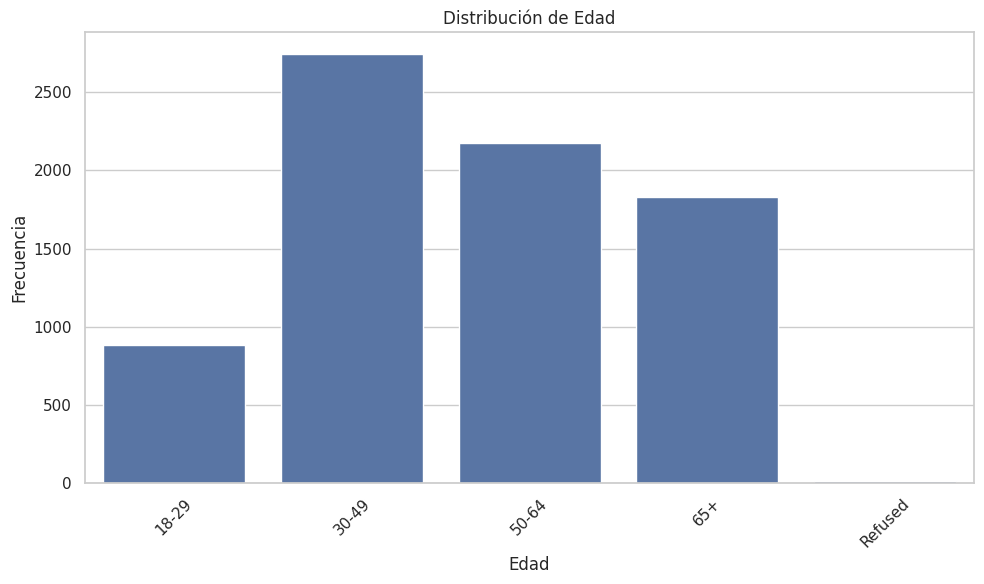

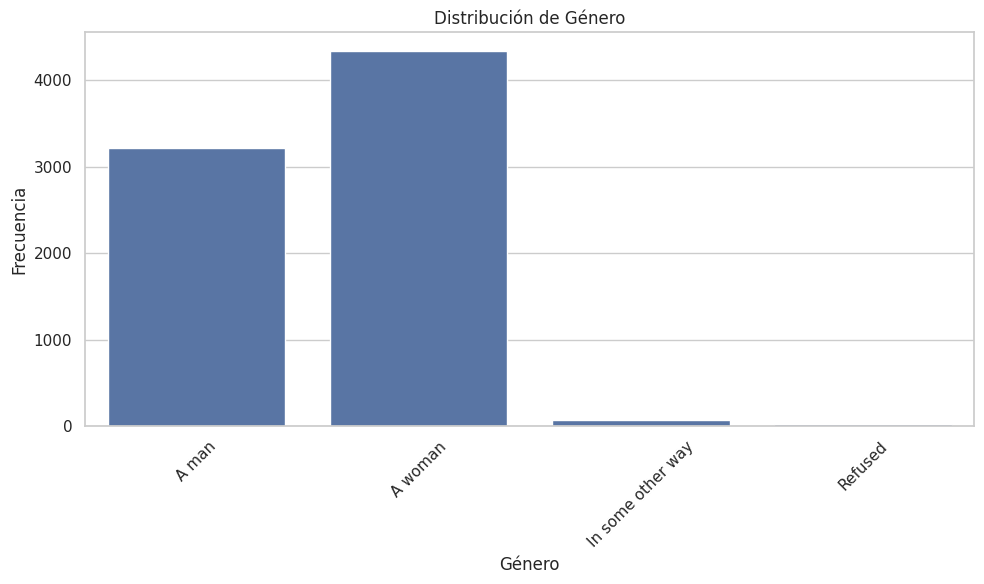

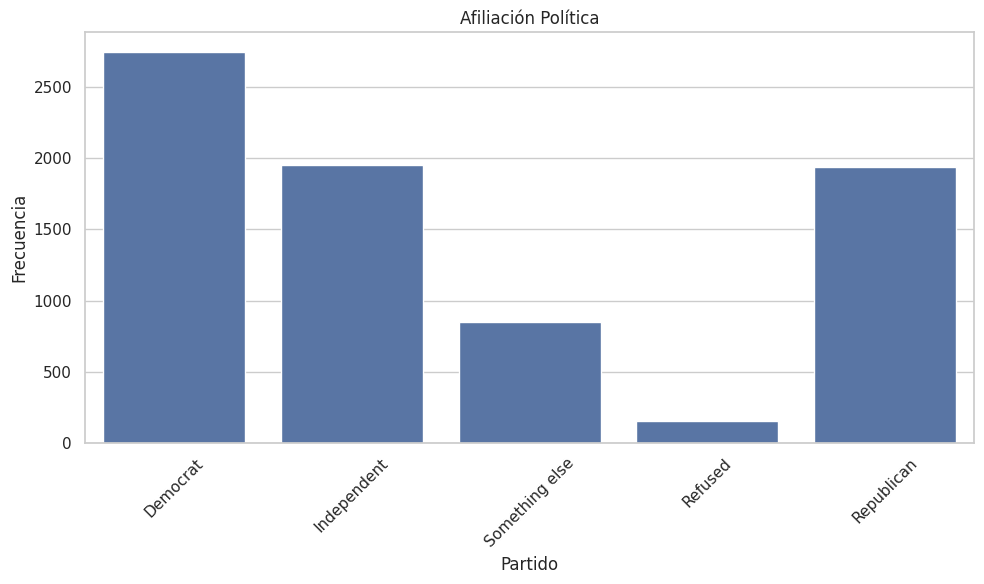

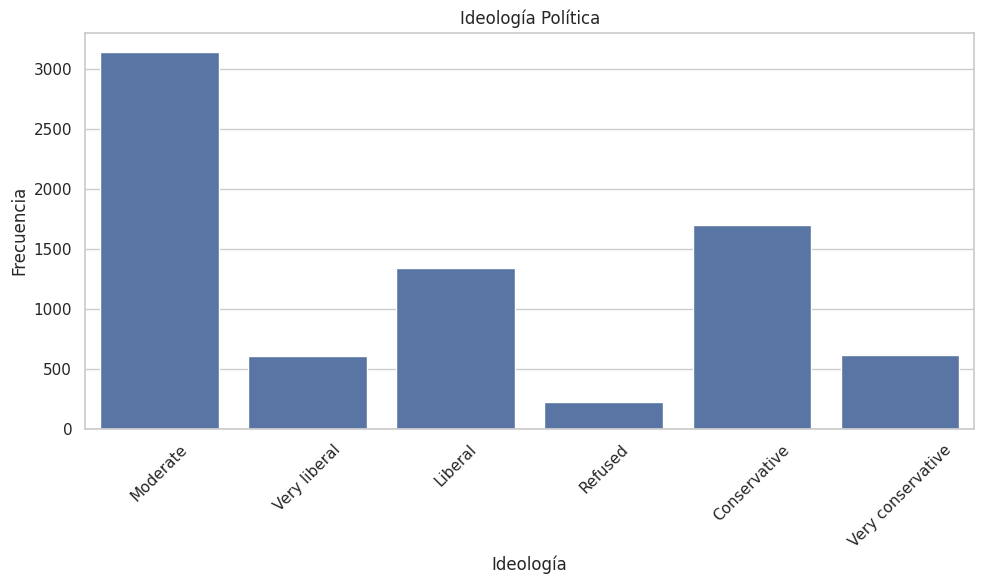

In [130]:
# Análisis descriptivo y visualización
sns.set(style="whitegrid")

def plot_distribution(variable, title, xlabel):
    plt.figure(figsize=(10, 6))
    sns.countplot(x=variable, data=df)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Distribuciones
plot_distribution('gest_biden', 'Aprobación de la Gestión de Joe Biden', 'Aprobación')
plot_distribution('voto_camara', 'Intención de Voto para la Cámara de Representantes', 'Intención de Voto')
plot_distribution('imp_raza', 'Importancia de Temas Raciales', 'Importancia de Temas Raciales')
plot_distribution('imp_inmigracion', 'Importancia de la Inmigración', 'Importancia de la Inmigración')
plot_distribution('pr_lo_representa', 'Representación por el Partido Republicano', 'Representación por el Partido Republicano')
plot_distribution('pd_lo_representa', 'Representación por el Partido Demócrata', 'Representación por el Partido Demócrata')
plot_distribution('pref_hisp_lat', 'Preferencia de Términos: Hispanic, Latino, Latinx', 'Preferencia de Término')
plot_distribution('age', 'Distribución de Edad', 'Edad')
plot_distribution('gender', 'Distribución de Género', 'Género')
plot_distribution('party', 'Afiliación Política', 'Partido')
plot_distribution('ideology', 'Ideología Política', 'Ideología')


# Análisis de relación entre variables

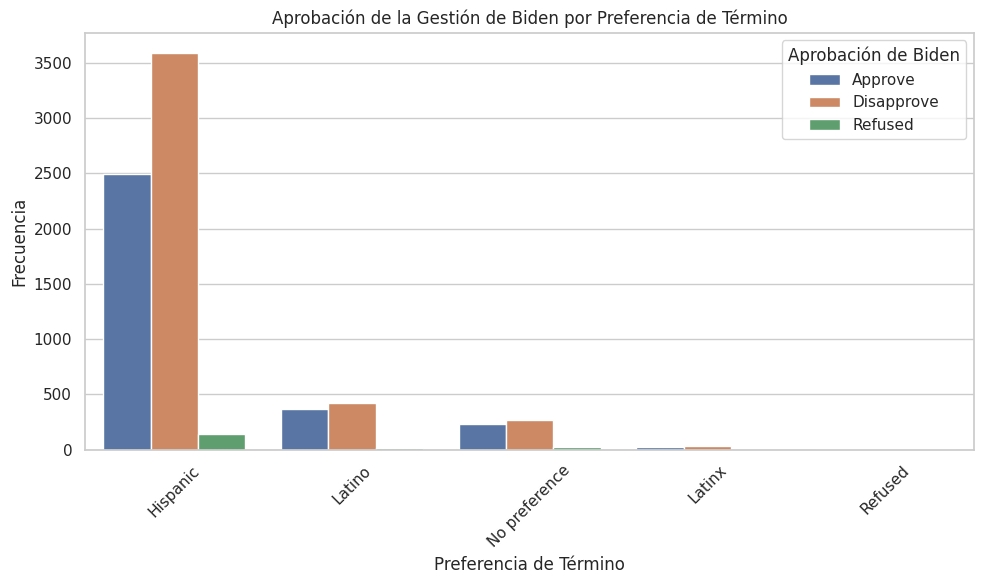

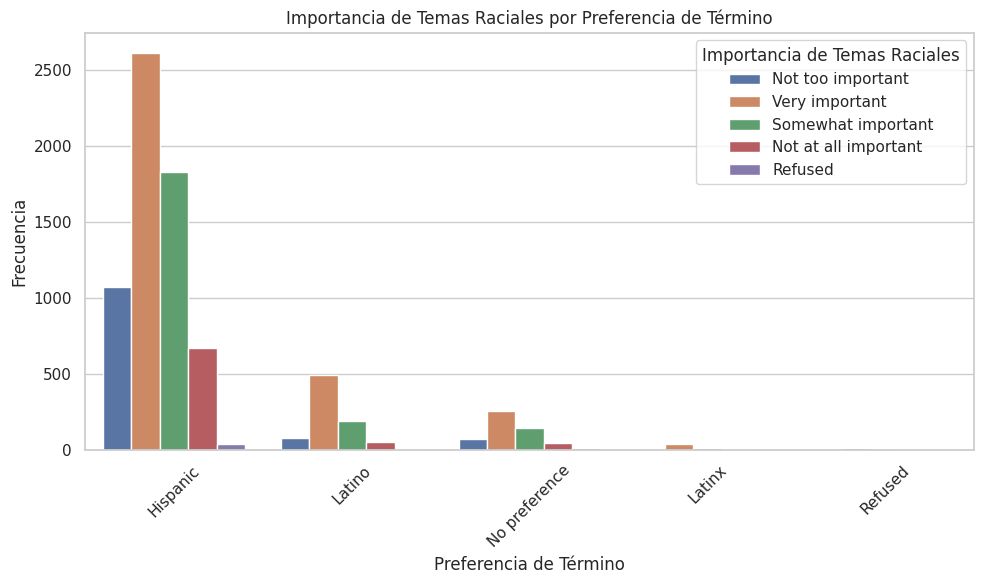

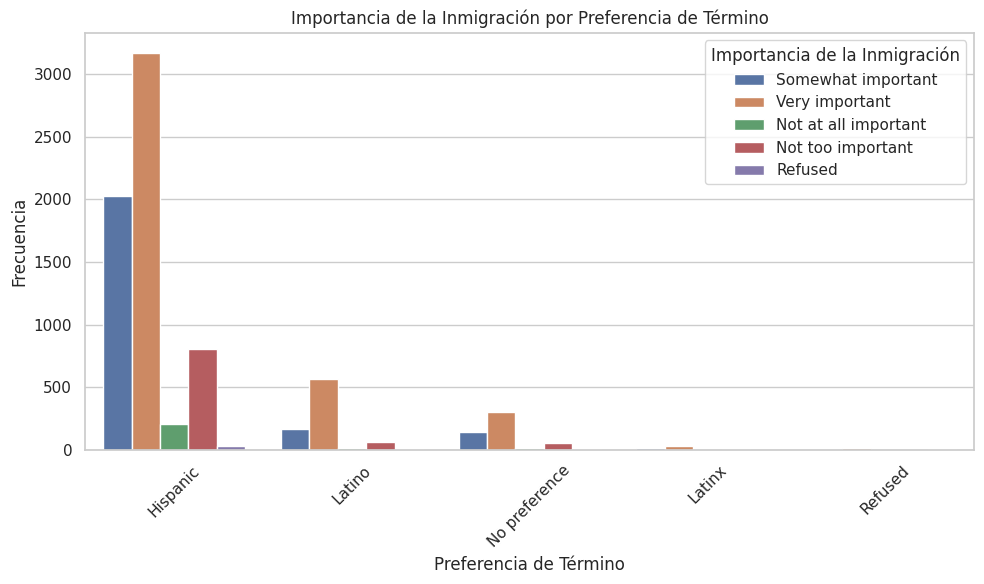

In [131]:
# Aprobación de Biden por preferencia de término
plt.figure(figsize=(10, 6))
sns.countplot(x='pref_hisp_lat', hue='gest_biden', data=df)
plt.title('Aprobación de la Gestión de Biden por Preferencia de Término')
plt.xlabel('Preferencia de Término')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Aprobación de Biden', loc='upper right')
plt.tight_layout()
plt.show()

# Importancia de temas raciales por preferencia de término
plt.figure(figsize=(10, 6))
sns.countplot(x='pref_hisp_lat', hue='imp_raza', data=df)
plt.title('Importancia de Temas Raciales por Preferencia de Término')
plt.xlabel('Preferencia de Término')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Importancia de Temas Raciales', loc='upper right')
plt.tight_layout()
plt.show()

# Importancia de la inmigración por preferencia de término
plt.figure(figsize=(10, 6))
sns.countplot(x='pref_hisp_lat', hue='imp_inmigracion', data=df)
plt.title('Importancia de la Inmigración por Preferencia de Término')
plt.xlabel('Preferencia de Término')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.legend(title='Importancia de la Inmigración', loc='upper right')
plt.tight_layout()
plt.show()


# Prueba de hipótesis

In [132]:
from scipy.stats import chi2_contingency

# Crear una tabla de contingencia para la preferencia de término y la aprobación de Biden
contingency_table = pd.crosstab(df['pref_hisp_lat'], df['gest_biden'])

# Realizar la prueba Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-cuadrado: {chi2}')
print(f'Valor p: {p}')

# Crear una tabla de contingencia para la preferencia de término y la importancia de temas raciales
contingency_table = pd.crosstab(df['pref_hisp_lat'], df['imp_raza'])

# Realizar la prueba Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-cuadrado: {chi2}')
print(f'Valor p: {p}')

# Crear una tabla de contingencia para la preferencia de término y la importancia de la inmigración
contingency_table = pd.crosstab(df['pref_hisp_lat'], df['imp_inmigracion'])

# Realizar la prueba Chi-cuadrado
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f'Chi-cuadrado: {chi2}')
print(f'Valor p: {p}')


Chi-cuadrado: 46.53525363431996
Valor p: 1.880164821685449e-07
Chi-cuadrado: 239.46118552891943
Valor p: 7.457584868075278e-42
Chi-cuadrado: 251.1184916281834
Valor p: 3.0515714881351246e-44


# Interpretación de los resultados de las pruebas de hipótesis

**Primer resultado pref_hisp_lat y gest_biden**

Chi-cuadrado: 46.53525363431996
Valor p: 1.880164821685449e-07
Asociación significativa entre las variables. La probabilidad de que estas variables no estén asociadas (dada por el valor p) es extremadamente baja.

**Segundo resultado pref_hisp_lat, imp_raza**

Chi-cuadrado: 239.46118552891943
Valor p: 7.457584868075278e-42
Valor de Chi-cuadrado más alto que el anterior y valor p extremadamente bajo.Asociación muy fuerte entre las variables analizadas.

**Tercer resultado pref_hisp_lat, imp_inmigracion**

Chi-cuadrado: 251.1184916281834
Valor p: 3.0515714881351246e-44
Valor de Chi-cuadrado más alto y, nuevamente, valor p extremadamente bajo.Asociación muy fuerte entre las variables.

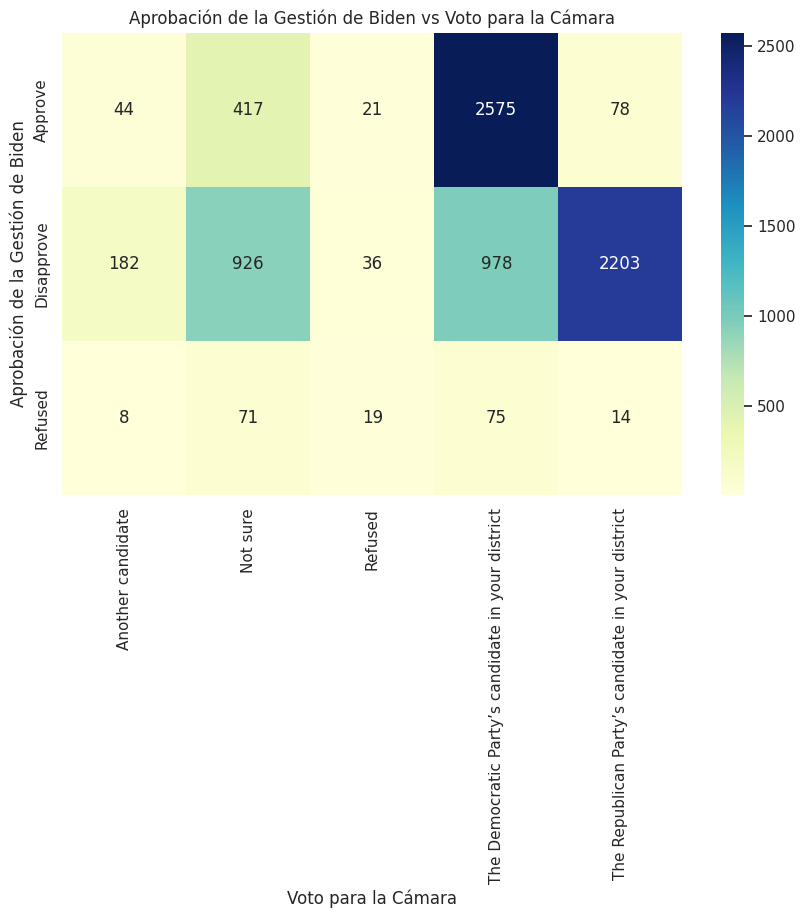

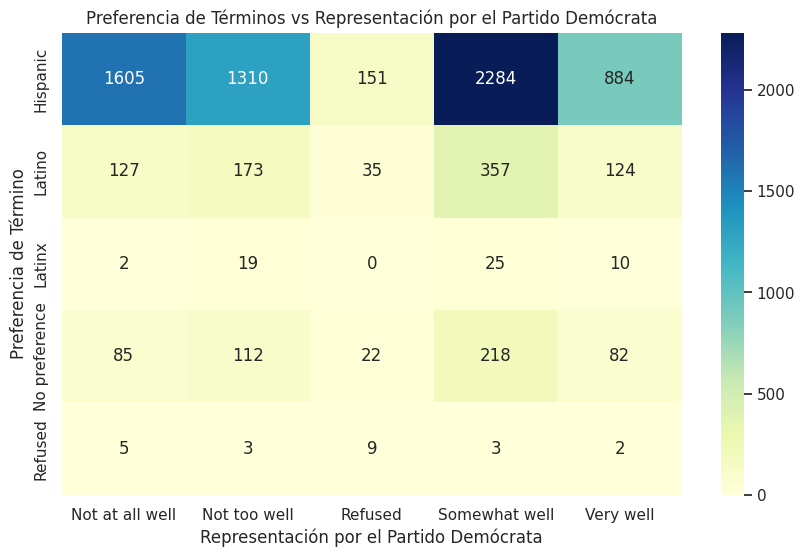

In [133]:
# Import pandas
import pandas as pd

# Crear tablas de contingencia
contingencia_biden_voto = pd.crosstab(df['gest_biden'], df['voto_camara'])
contingencia_pref_rep_dem = pd.crosstab(df['pref_hisp_lat'], df['pd_lo_representa'])

# Visualizar las tablas de contingencia con gráficos de calor
def plot_heatmap(contingency_table, title, xlabel, ylabel):
    plt.figure(figsize=(10, 6))
    sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Visualizar la tabla de contingencia para gest_biden y voto_camara
plot_heatmap(contingencia_biden_voto, 'Aprobación de la Gestión de Biden vs Voto para la Cámara', 'Voto para la Cámara', 'Aprobación de la Gestión de Biden')

# Visualizar la tabla de contingencia para pref_hisp_lat y pd_lo_representa
plot_heatmap(contingencia_pref_rep_dem, 'Preferencia de Términos vs Representación por el Partido Demócrata', 'Representación por el Partido Demócrata', 'Preferencia de Término')

# Gráficos

**Gráfico de Barras Apiladas: Aprobación de la Gestión de Biden por Intención de Voto para la Cámara y Preferencia de Término**

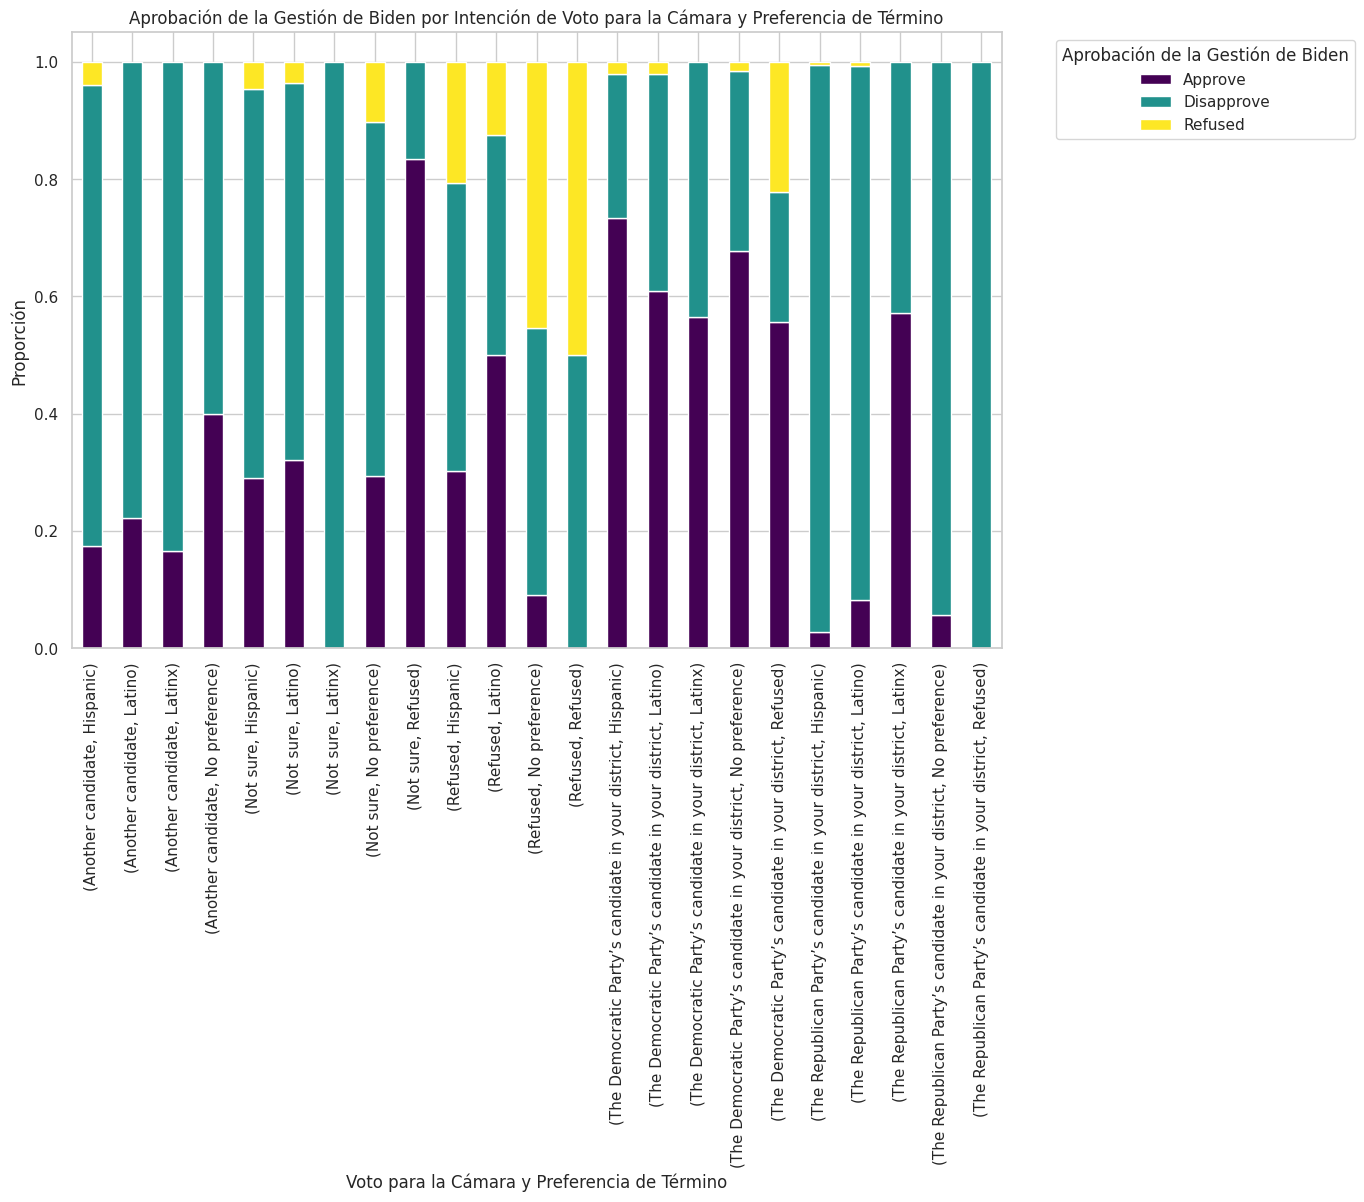

In [134]:
# Crear tabla de contingencia
contingency_table = pd.crosstab([df['voto_camara'], df['pref_hisp_lat']], df['gest_biden'], normalize='index')

# Crear gráfico de barras apiladas
contingency_table.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Aprobación de la Gestión de Biden por Intención de Voto para la Cámara y Preferencia de Término')
plt.xlabel('Voto para la Cámara y Preferencia de Término')
plt.ylabel('Proporción')
plt.legend(title='Aprobación de la Gestión de Biden', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Se observa un mayor nivel de de aprobación entre quienes votan al Partido Demócrata pero prefiere el término "hispano". No se condice con la hipótesis

**Gráfico de Barras Apiladas: Importancia de la Igualdad Racial por Intención de Voto y Preferencia de Término**

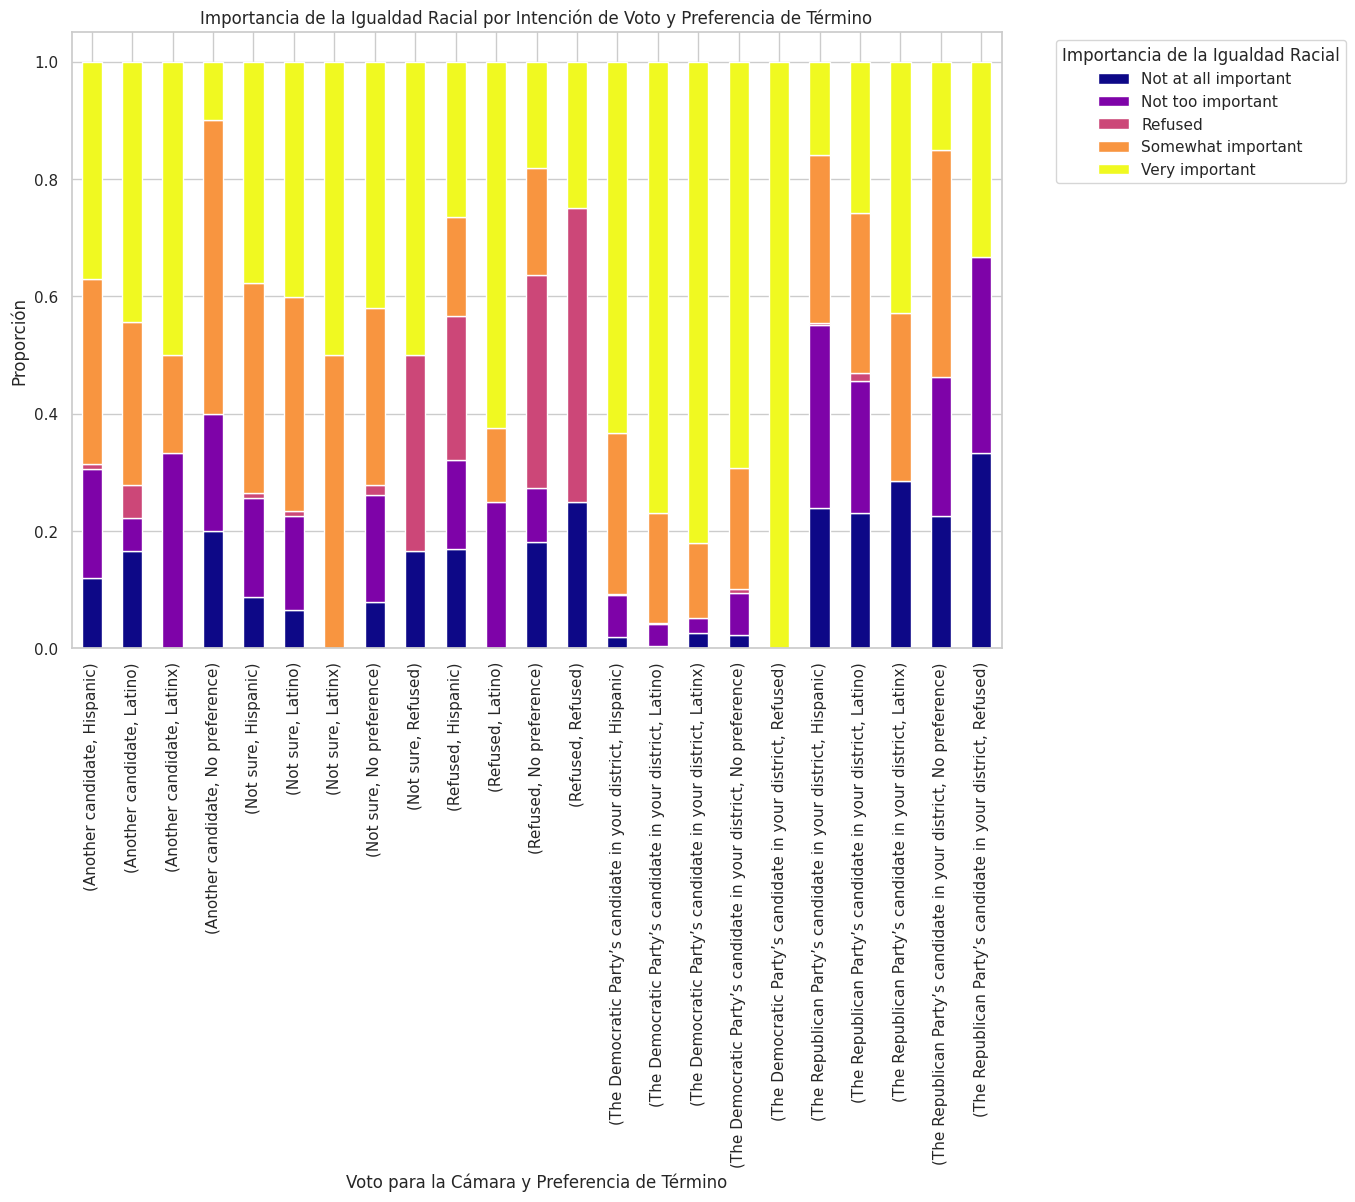

In [135]:
# Crear tabla de contingencia
contingency_table_race = pd.crosstab([df['voto_camara'], df['pref_hisp_lat']], df['imp_raza'], normalize='index')

# Crear gráfico de barras apiladas
contingency_table_race.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='plasma')
plt.title('Importancia de la Igualdad Racial por Intención de Voto y Preferencia de Término')
plt.xlabel('Voto para la Cámara y Preferencia de Término')
plt.ylabel('Proporción')
plt.legend(title='Importancia de la Igualdad Racial', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Aquí sí refuerza la hipótesis acerca de que quienes prefieren el término latino y votan al Partido Demócrata le dan mas importancia a la igualdad racial

**Gráfico de Barras Apiladas: Importancia de la Inmigración por Intención de Voto y Preferencia de Término**

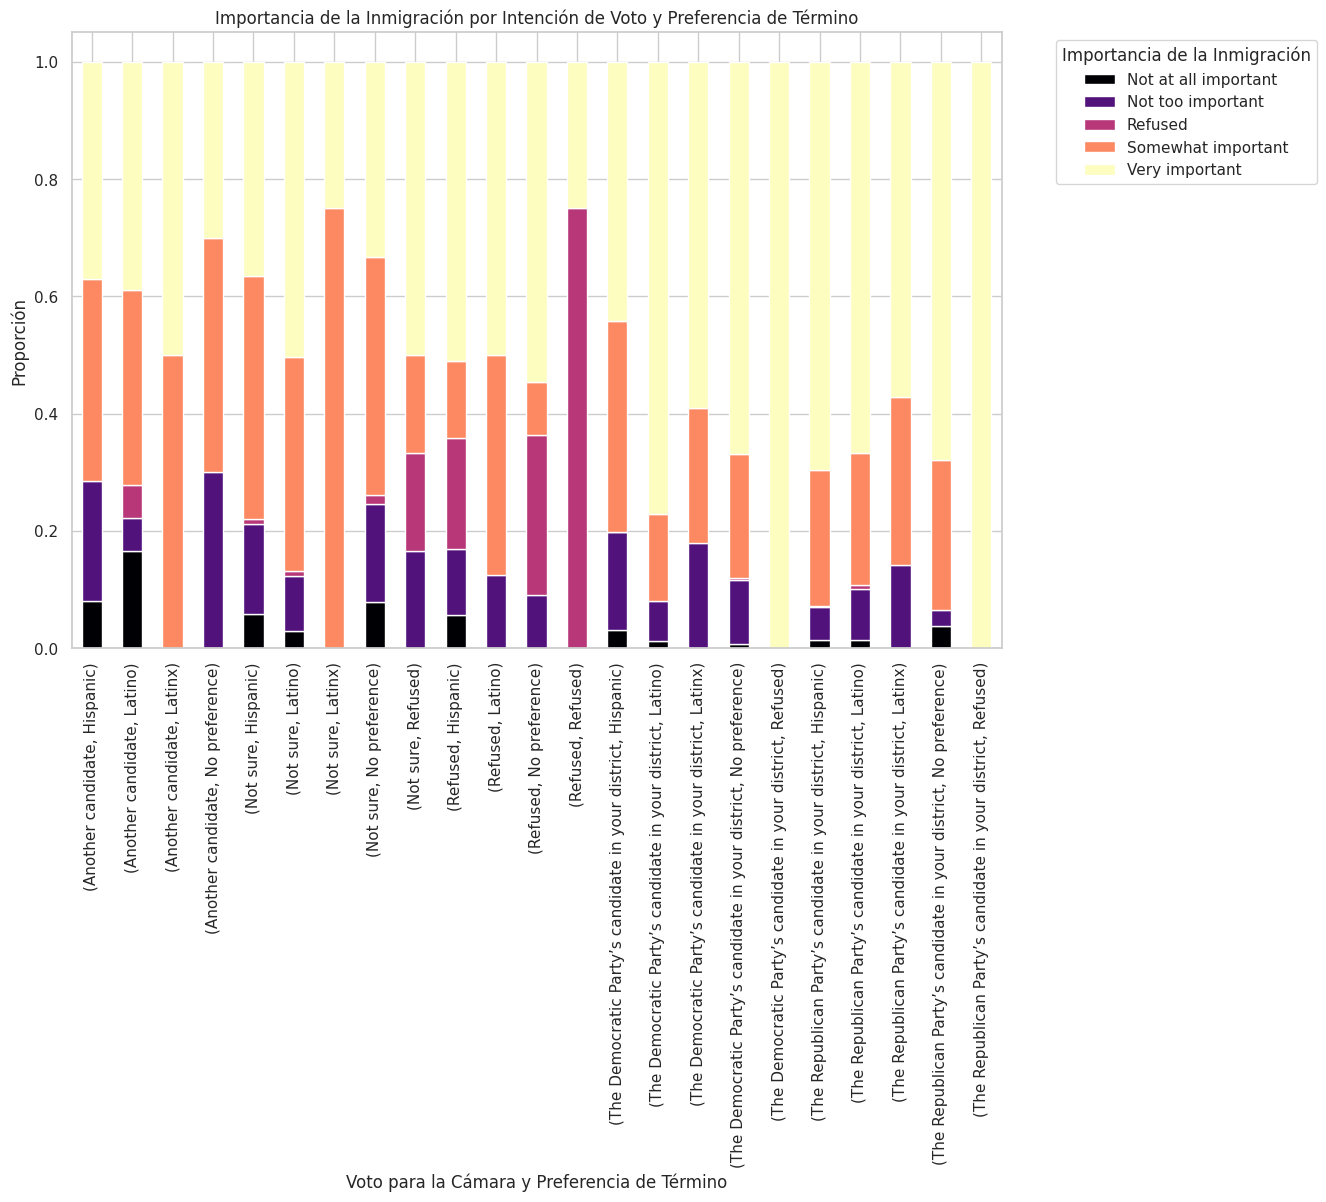

In [136]:
# Crear tabla de contingencia
contingency_table_immigration = pd.crosstab([df['voto_camara'], df['pref_hisp_lat']], df['imp_inmigracion'], normalize='index')

# Crear gráfico de barras apiladas
contingency_table_immigration.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='magma')
plt.title('Importancia de la Inmigración por Intención de Voto y Preferencia de Término')
plt.xlabel('Voto para la Cámara y Preferencia de Término')
plt.ylabel('Proporción')
plt.legend(title='Importancia de la Inmigración', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Nuevamente quienes votan al Partido Demócrata y prefieren el término latino, le dan mas importancia a las políticas de inmigración que el resto de los segmentos de la sociedad

**Diagrama de cajas**

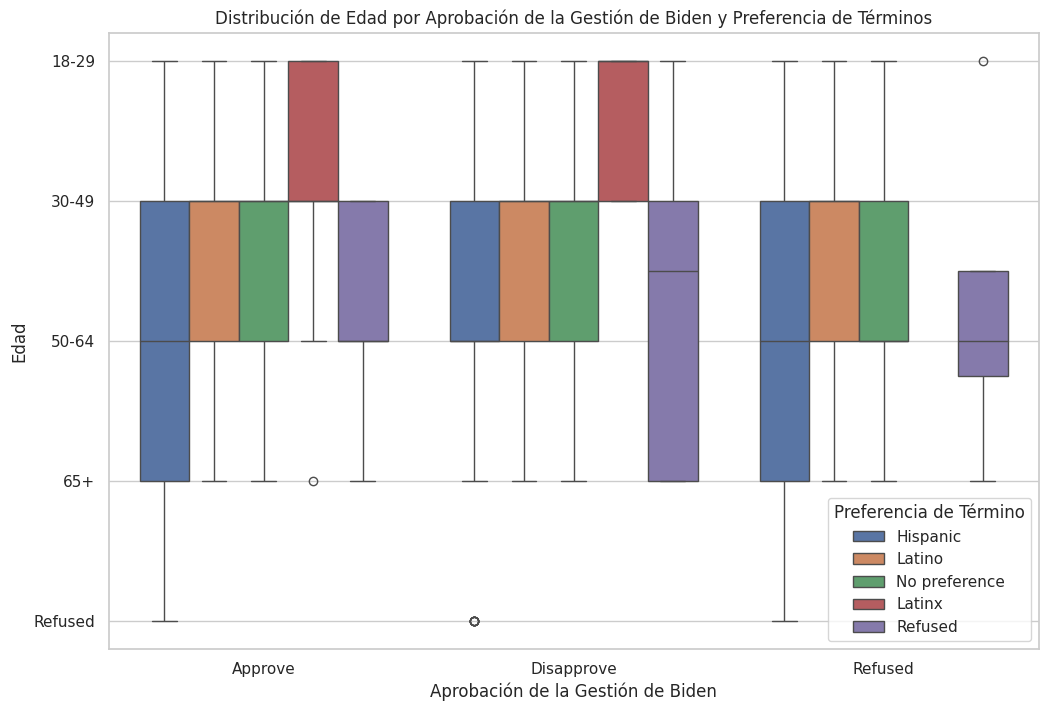

In [137]:
# Crear gráfico de caja y bigotes
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, x='gest_biden', y='age', hue='pref_hisp_lat')
plt.title('Distribución de Edad por Aprobación de la Gestión de Biden y Preferencia de Términos')
plt.xlabel('Aprobación de la Gestión de Biden')
plt.ylabel('Edad')
plt.legend(title='Preferencia de Término')
plt.show()

PREGUNTAS DE INTERES
# GRÁFICOS

¿CÓMO SE DISTRIBUYE LA IDENTIFICACIÓN POLÍTICA ENTRE LOS ENCUESTADOS EN FUNCIÓN DE SU PREFERENCIA TERMINOLOGICA?

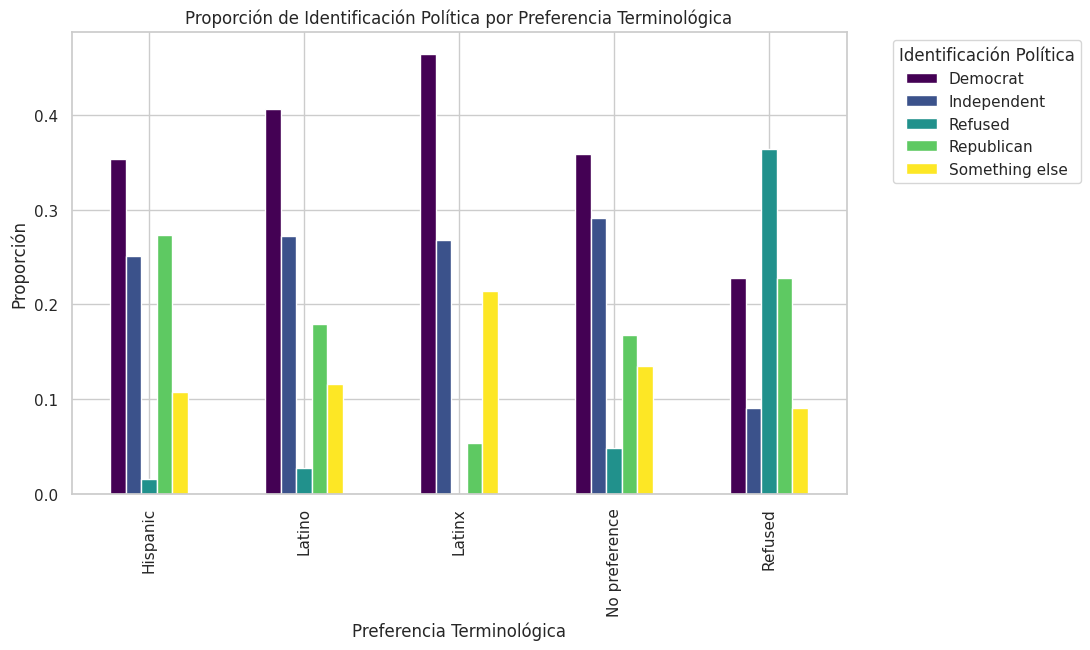

In [138]:
# Crear una tabla de contingencia
contingency_table = pd.crosstab(df['pref_hisp_lat'], df['party'], normalize='index')

# Crear el gráfico de barras de proporciones
contingency_table.plot(kind='bar', figsize=(10, 6), colormap='viridis')
plt.title('Proporción de Identificación Política por Preferencia Terminológica')
plt.xlabel('Preferencia Terminológica')
plt.ylabel('Proporción')
plt.legend(title='Identificación Política', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Los niveles de voto al Partido Demócrata son mas altos entre aquellos que prefieren el término latino, en contraposición a hispano

¿CÓMO VARÍAN LAS PRIORIDADES POLÍTICAS DE LOS ENCUESTADOS EN FUNCION DE SU IDENTIFICACION POLITICA Y PREFERENCIA TERMINOLOGICA?

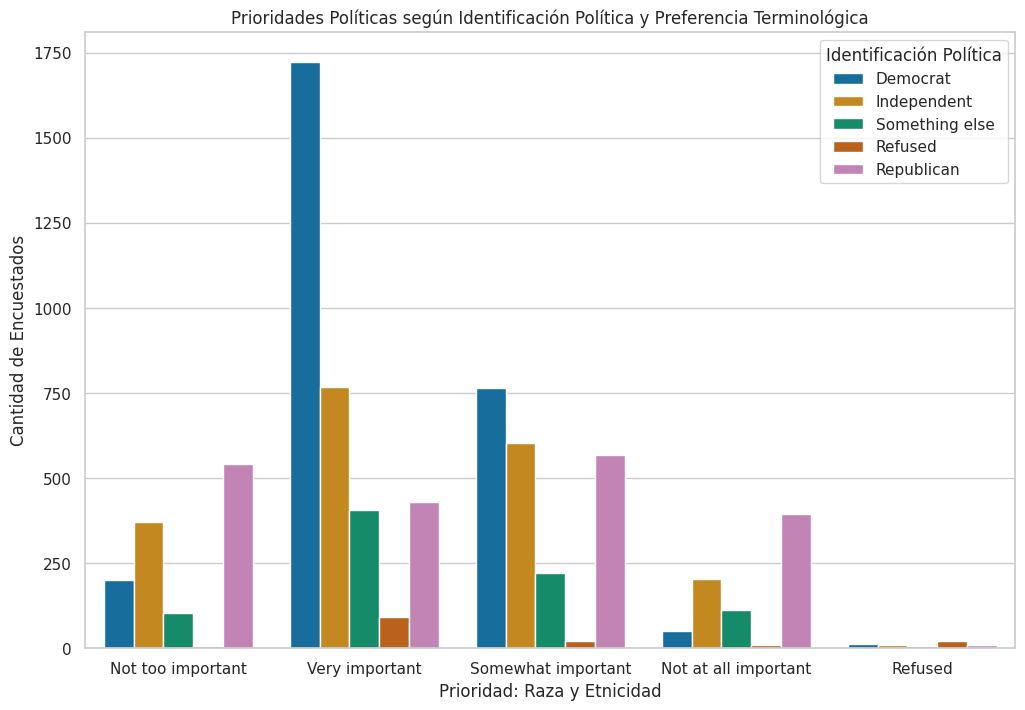

In [139]:
plt.figure(figsize=(12, 8))
sns.countplot(x='imp_raza', hue='party', data=df, palette='colorblind')
plt.title('Prioridades Políticas según Identificación Política y Preferencia Terminológica')
plt.xlabel('Prioridad: Raza y Etnicidad')
plt.ylabel('Cantidad de Encuestados')
plt.legend(title='Identificación Política', loc='upper right')
plt.show()


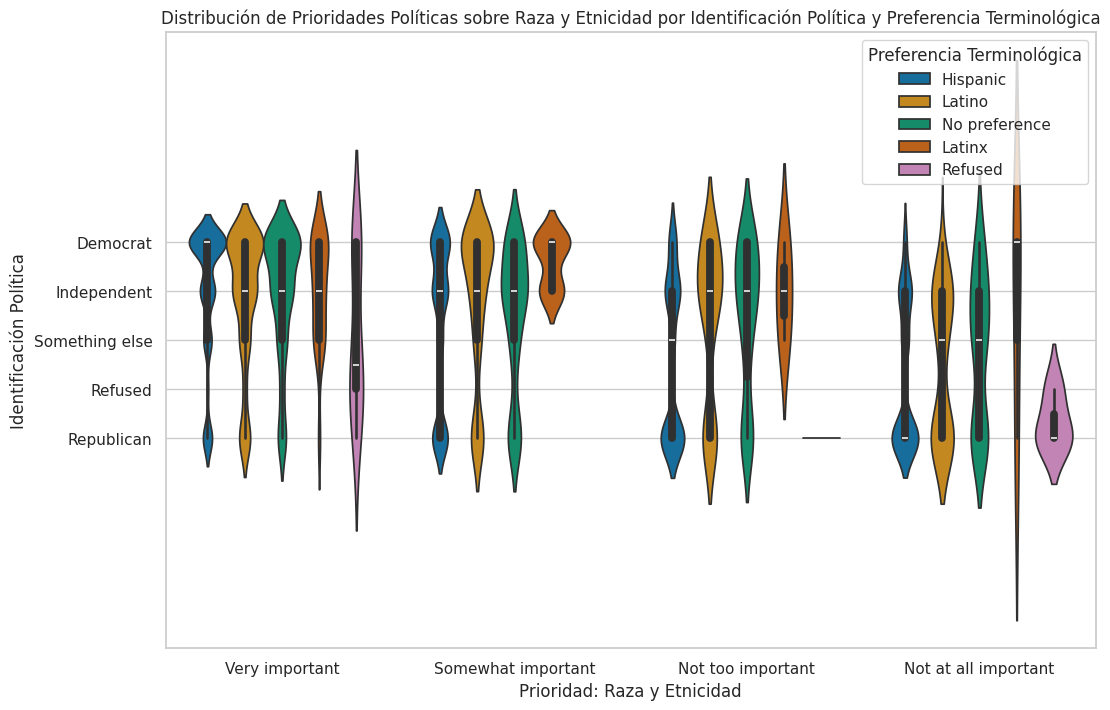

In [140]:
plt.figure(figsize=(12, 8))
sns.violinplot(x='imp_raza', y='party', hue='pref_hisp_lat', data=df, palette='colorblind', order=['Very important', 'Somewhat important', 'Not too important', 'Not at all important'])
plt.title('Distribución de Prioridades Políticas sobre Raza y Etnicidad por Identificación Política y Preferencia Terminológica')
plt.xlabel('Prioridad: Raza y Etnicidad')
plt.ylabel('Identificación Política')
plt.legend(title='Preferencia Terminológica')
plt.show()


# FEATURE SELECTION

In [141]:
!pip install pandas category_encoders scikit-learn seaborn matplotlib
import pandas as pd
import category_encoders as ce
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt


In [142]:
# Codificar las variables categóricas
encoder = ce.OrdinalEncoder()
df_encoded = encoder.fit_transform(df)

# Mostrar el DataFrame codificado
print(df_encoded.head())


   id  sat_sit_pais  gest_biden  describe_biden_modelo  \
0  10             1           1                      1   
1  11             2           1                      1   
2  12             1           2                      2   
3  13             2           2                      3   
4  18             2           1                      1   

   describe_biden_necesidades  describe_biden_defiende  \
0                           1                        1   
1                           2                        2   
2                           3                        3   
3                           3                        4   
4                           2                        2   

   describe_biden_honesto  describe_biden_inspirador  voto_camara  \
0                       1                          1            1   
1                       2                          1            2   
2                       3                          2            2   
3                       3 

In [143]:
# Definir X (variables predictoras) y y (variable objetivo)
X = df_encoded.drop('voto_camara', axis=1)
y = df_encoded['voto_camara']

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [144]:
# Inicializar el modelo Random Forest
model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred))


Precisión del modelo: 0.8261437908496732
              precision    recall  f1-score   support

           1       0.87      0.93      0.90       454
           2       0.85      0.96      0.90       746
           3       0.61      0.45      0.52       274
           4       0.00      0.00      0.00        45
           5       1.00      0.09      0.17        11

    accuracy                           0.83      1530
   macro avg       0.67      0.49      0.50      1530
weighted avg       0.79      0.83      0.80      1530



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<ipython-input-145-6ee3aab5e7b7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


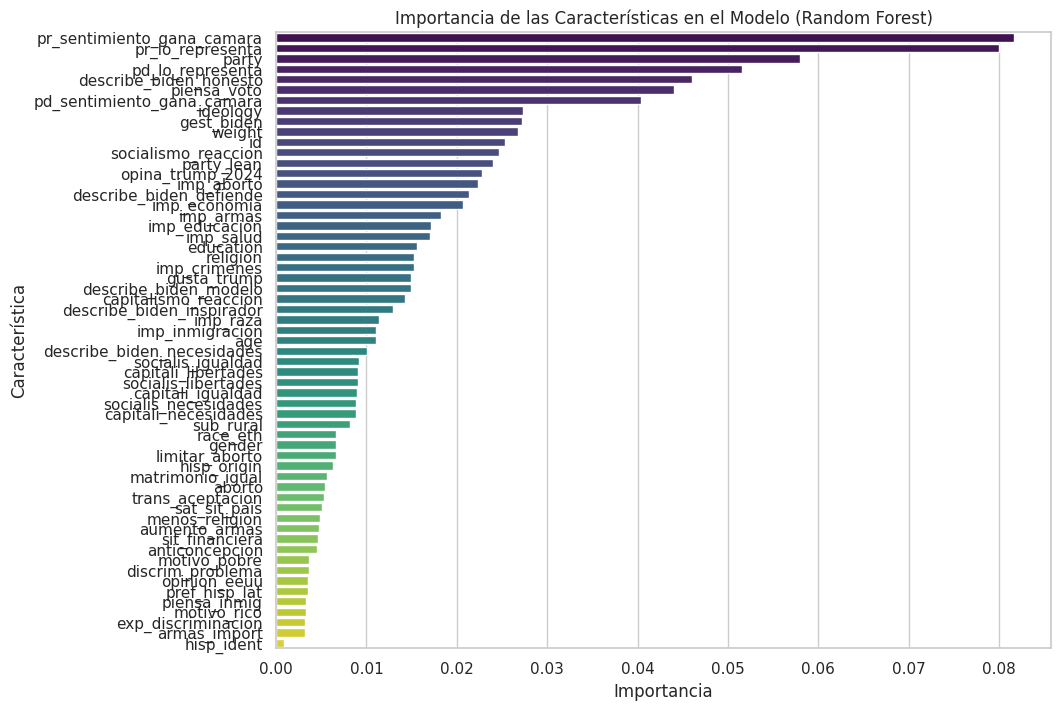

In [145]:
# Obtener la importancia de las características (features) en el modelo
feature_importances = model.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feat_imp_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar el DataFrame por importancia descendente
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Visualizar la importancia de las características
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title('Importancia de las Características en el Modelo (Random Forest)')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


In [146]:
# Precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy}')


Precisión del modelo: 0.8261437908496732


In [147]:
# Reporte de clasificación
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           1       0.87      0.93      0.90       454
           2       0.85      0.96      0.90       746
           3       0.61      0.45      0.52       274
           4       0.00      0.00      0.00        45
           5       1.00      0.09      0.17        11

    accuracy                           0.83      1530
   macro avg       0.67      0.49      0.50      1530
weighted avg       0.79      0.83      0.80      1530



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


El modelo tiene un buen rendimiento general para las clases mayoritarias (1 y 2), pero necesita mejorar en la clasificación de las clases minoritarias (como la clase 4).

In [148]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Hacer predicciones sobre los datos de prueba
y_pred = model.predict(X_test)

# Calcular matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)
print()

# Calcular precisión, recall, f1-score y soporte para cada clase
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))
print()

# Calcular exactitud (accuracy)
accuracy = accuracy_score(y_test, y_pred)
print(f"Exactitud del Modelo: {accuracy:.2f}")


Matriz de Confusión:
[[422  10  22   0   0]
 [  2 717  27   0   0]
 [ 50 100 124   0   0]
 [  7  14  24   0   0]
 [  4   1   5   0   1]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           1       0.87      0.93      0.90       454
           2       0.85      0.96      0.90       746
           3       0.61      0.45      0.52       274
           4       0.00      0.00      0.00        45
           5       1.00      0.09      0.17        11

    accuracy                           0.83      1530
   macro avg       0.67      0.49      0.50      1530
weighted avg       0.79      0.83      0.80      1530


Exactitud del Modelo: 0.83


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Matriz de confusión

Precisiones: La mayoría de las predicciones caen en las clases 1 y 2, con una precisión alta en general (0.87 y 0.85 respectivamente).

Errores: Se observan errores notables en la clasificación de las clases 3 y 4, donde la matriz muestra un número significativo de predicciones incorrectas.

# Reporte de Clasificación

Alta precisión en clases mayoritarias: El modelo tiene una precisión alta para las clases mayoritarias (1 y 2), lo que indica que es efectivo en la predicción de opiniones favorables y desfavorables sobre la administración de Biden entre los encuestados.

Desafíos en clases minoritarias: Las clases minoritarias (3, 4 y 5) muestran métricas más bajas, especialmente la clase 4 que tiene una precisión y recall de 0. El modelo tiene dificultades para clasificar estas categorías menos frecuentes.

Recall bajo en clase 5: Aunque la precisión para la clase 5 es perfecta (1.00), el recall es muy bajo (0.09), lo que significa que el modelo solo identifica correctamente un pequeño porcentaje de los casos reales de esta clase.

F1-Score y promedio ponderado: El f1-score promedio ponderado es del 0.80, lo que indica un rendimiento general decente del modelo. Sin embargo, es importante mejorar el rendimiento en las clases minoritarias para una mayor precisión global.

Sería crucial mejorar la precisión y recall en las clases minoritarias.